# Part II: Kaggle Competition (30%)
Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
   - **Bottom 40%**: Get 20% of the 30% available for this section.
   - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   

Submit your last submission **BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.


## 1. Data Preparation

First I import the libraries and load the preprocessed data. 

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow as tf
import keras
%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tf.__version__)
print("keras: " + keras.__version__)

gensim: 4.2.0
tensorflow: 2.10.0
keras: 2.10.0


In [2]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# load the data
df = pd.read_pickle("part2_data/cleaned_tweets.pkl")

In [5]:
df_train = df.loc[df.identification == 'train']
df_test = df.loc[df.identification == 'test']
df_train

,tweet_id,text,hashtags,emotion,identification,unigrams,remove_stopwords
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation,train,"[People, who, post, ``, add, me, on, #, Snapch...",People post `` add Snapchat '' must dehydrated...
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness,train,"[@, brianklaas, As, we, see, ,, Trump, is, dan...",brianklaas see Trump dangerous freepress aroun...
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear,train,"[Now, ISSA, is, stalking, Tasha, 😂😂😂, <, LH, >]",ISSA stalking Tasha 😂😂😂 LH
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",joy,train,"[@, RISKshow, @, TheKevinAllison, Thx, for, th...",RISKshow TheKevinAllison Thx BEST TIME tonight...
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],anticipation,train,"[Still, waiting, on, those, supplies, Liscus, ...",Still waiting supplies Liscus LH
...,...,...,...,...,...,...,...
1867526,0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,"[NoWonder, Happy]",joy,train,"[I, 'm, SO, HAPPY, !, !, !, #, NoWonder, the, ...",'m HAPPY NoWonder name show Happy HappySYFY SY...
1867527,0x38959e,In every circumtance I'd like to be thankful t...,[],joy,train,"[In, every, circumtance, I, 'd, like, to, be, ...",every circumtance 'd like thankful Almighty Je...
1867528,0x2cbca6,there's currently two girls walking around the...,[blessyou],joy,train,"[there, 's, currently, two, girls, walking, ar...",'s currently two girls walking around library ...
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",[],joy,train,"[Ah, ,, corporate, life, ,, where, you, can, d...",Ah corporate life date LH using relative anach...


From the emotiond distribution, it's obviously that the data is imbalance. Therefore I tried under sampling the data to get balanced dataset.

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64


Text(0.5, 0, 'category')

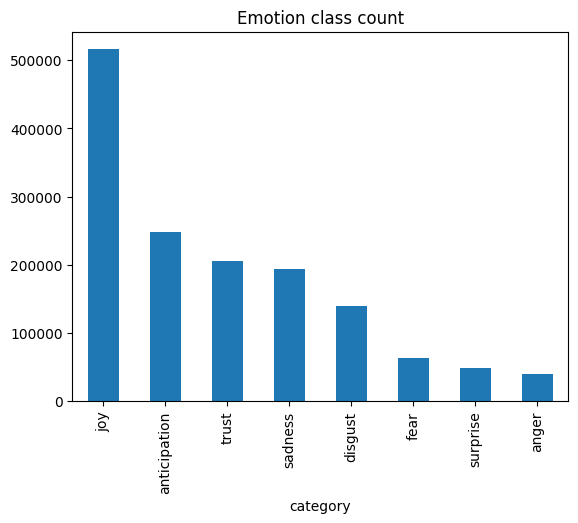

In [6]:
print(df_train.groupby(['emotion']).count()['text'])
df_train['emotion'].value_counts().plot(kind='bar')
plt.title('Emotion class count')
plt.xlabel("category")

In [7]:
# under sampling
condition = df_train['emotion'] == 'anger'
df_select = df_train[condition].sample(3000)
condition = df_train['emotion'] == 'anticipation'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'disgust'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'fear'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'joy'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'sadness'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'surprise'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])
condition = df_train['emotion'] == 'trust'
df_tmp = df_train[condition].sample(3000)
df_select = pd.concat([df_select, df_tmp])

df_train = df_select.reset_index(drop=True)
print(df_train.groupby(['emotion']).count()['text'])

emotion
anger           3000
anticipation    3000
disgust         3000
fear            3000
joy             3000
sadness         3000
surprise        3000
trust           3000
Name: text, dtype: int64


## 2. Feature Engineerring

## 2.1 Generate TF-IDF feature

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tfidf_matrix = tf_transformer.fit_transform(df_train.remove_stopwords)
print(tfidf_matrix.shape)

(24000, 41093)


In [9]:
# connecting term to its sums frequency
terms = tf_transformer.get_feature_names()
sums = tfidf_matrix.sum(axis=0)
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
df_tfidf_ranking = ranking.sort_values('rank', ascending = False)
df_tfidf_ranking.head()

,term,rank
21124,lh,1560.786572
21196,life,217.180428
21277,like,196.454873
36850,today,189.400541
14635,get,187.862075


From the ranking, some keywords such as "like", "love", etc. are extracted. It is reasonable since the most labeled emotion is "joy". 

In [10]:
df_train

,tweet_id,text,hashtags,emotion,identification,unigrams,remove_stopwords
0,0x286832,Thousands of blithering dunder-headed vivisect...,[],anger,train,"[Thousands, of, blithering, dunder-headed, viv...",Thousands blithering dunder-headed vivisection...
1,0x1d3dff,@crusher614 @SylviaHandwerg4 Haha of course th...,[],anger,train,"[@, crusher614, @, SylviaHandwerg4, Haha, of, ...",crusher614 SylviaHandwerg4 Haha course bunch l...
2,0x3775a5,"🕘 02:00 18 Sep <LH> 🇺🇸USD = 9,35 🇪🇺EUR = 11,15...",[],anger,train,"[🕘, 02:00, 18, Sep, <, LH, >, 🇺🇸USD, =, 9,35, ...","🕘 02:00 18 Sep LH 🇺🇸USD 9,35 🇪🇺EUR 11,15 🇨🇦CAD..."
3,0x24b10b,<LH> I have every right to be angry at people!...,[],anger,train,"[<, LH, >, I, have, every, right, to, be, angr...",LH every right angry people n't go restricting...
4,0x273709,Lost my headphones at uni today 😒😪 <LH>,[],anger,train,"[Lost, my, headphones, at, uni, today, 😒😪, <, ...",Lost headphones uni today 😒😪 LH
...,...,...,...,...,...,...,...
23995,0x2955b3,Just me an the family that's left that loves m...,[lessonlearned],trust,train,"[Just, me, an, the, family, that, 's, left, th...",family 's left loves .. Ima hold never settle ...
23996,0x371b66,Its a BitterSweet moment when u no longer care...,[forget],trust,train,"[Its, a, BitterSweet, moment, when, u, no, lon...",BitterSweet moment u longer care enuf hate em ...
23997,0x2c1593,Wonderful energy @lovehotyogasw19 this morning...,"[bikram, hotyoga]",trust,train,"[Wonderful, energy, @, lovehotyogasw19, this, ...",Wonderful energy lovehotyogasw19 morning TheHo...
23998,0x282afe,#MyTipsForMentalHealth true friends show thems...,"[MyTipsForMentalHealth, Spoonie, invisibleilln...",trust,train,"[#, MyTipsForMentalHealth, true, friends, show...",MyTipsForMentalHealth true friends show least ...


In [11]:
# transform the text removing stopwords in to vectors
X = tf_transformer.transform(df_train.remove_stopwords)
y = df_train.emotion

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 41093)
(4800, 41093)
(19200,)
(4800,)


## 2.2 Build Model

Here I build two kinds of model: deicsion tree and random forest. We can observe that **random forest<font color=#800000>(acc = 0.39)</font> has better performance than decision tree<font color=#800000>(acc = o.32)</font>**. However, these are not good enough to do the classification. Therefore, I work on NN model.

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['trust', 'disgust', 'fear', 'anticipation', 'sadness', 'fear',
       'sadness', 'joy', 'sadness', 'fear'], dtype=object)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('confusion matrix:')
print(cm)

training accuracy: 1.0
testing accuracy: 0.32
classification report:
              precision    recall  f1-score   support

       anger       0.36      0.31      0.34       613
anticipation       0.38      0.36      0.37       591
     disgust       0.26      0.28      0.27       594
        fear       0.37      0.39      0.38       596
         joy       0.30      0.33      0.31       592
     sadness       0.31      0.32      0.31       590
    surprise       0.33      0.31      0.32       613
       trust       0.29      0.28      0.29       611

    accuracy                           0.32      4800
   macro avg       0.32      0.32      0.32      4800
weighted avg       0.32      0.32      0.32      4800

confusion matrix:
[[193  52  78  55  63  63  48  61]
 [ 33 214  57  49  67  50  51  70]
 [ 57  46 167  56  54  94  65  55]
 [ 45  53  66 234  57  45  51  45]
 [ 35  53  57  64 195  37  61  90]
 [ 63  43  94  53  56 186  50  45]
 [ 56  40  67  69  69  69 189  54]
 [ 55  58  63  57

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

## training!
RF_model = RF_model.fit(X_train, y_train)

## predict!
y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anticipation', 'disgust', 'anger', 'disgust', 'disgust', 'joy',
       'anger', 'trust', 'sadness', 'disgust'], dtype=object)

In [17]:
# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('confusion matrix:')
print(cm)

training accuracy: 1.0
testing accuracy: 0.4
classification report:
              precision    recall  f1-score   support

       anger       0.44      0.38      0.41       613
anticipation       0.50      0.44      0.47       591
     disgust       0.28      0.47      0.35       594
        fear       0.47      0.50      0.49       596
         joy       0.38      0.39      0.38       592
     sadness       0.37      0.34      0.36       590
    surprise       0.43      0.33      0.37       613
       trust       0.44      0.35      0.39       611

    accuracy                           0.40      4800
   macro avg       0.41      0.40      0.40      4800
weighted avg       0.41      0.40      0.40      4800

confusion matrix:
[[230  41 129  47  58  46  40  22]
 [ 21 261  83  46  59  34  36  51]
 [ 62  27 277  37  41  87  43  20]
 [ 39  25  76 299  50  37  37  33]
 [ 30  59  57  61 233  37  36  79]
 [ 59  22 144  53  41 203  45  23]
 [ 51  33 126  49  42  63 204  45]
 [ 29  55  98  44 

## 3. Deep Learning Model

### 3.1 Prepare data

First, I preprocess the text using bag of word as the feature. For the emotion labels, I encode them into one hot. 

In [18]:
# use Bag of Word as feature
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW = CountVectorizer(tokenizer = nltk.word_tokenize) 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW.fit(df_train['text'])

# get data
X = BOW.transform(df_train.text)
y = df_train.emotion

In [19]:
# split training set and testint set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 46390)
(4800, 46390)
(19200,)
(4800,)


In [21]:
# deal with label into one hot
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('\033[36mlabels:', label_encoder.classes_)
print('\033[36mBefore convert:\033[0m')
print('y_train[0:4]:\n', y_train[0:4])
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\033[36mAfter convert:\033[0m')
print('y_train[0:4]:\n', y_train[0:4])
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


labels: ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']
Before convert:
y_train[0:4]:
 15613    sadness
17719    sadness
16235    sadness
467        anger
Name: emotion, dtype: object
y_train.shape:  (19200,)
y_test.shape:  (4800,)
After convert:
y_train[0:4]:
 [[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]
y_train.shape:  (19200, 8)
y_test.shape:  (4800, 8)


### 3.2 Build model

The NN model is consisted of the input/output layer and two hidden layer. To train the model, I use Adam as the optimizer and use cross entropy to calculate the loss in order to check when the model is overfitting. 

In [22]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  46390
output_shape:  8


In [23]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46390)]           0         
                                                                 
 dense (Dense)               (None, 64)                2969024   
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 softmax (Softmax)           (N

2022-11-22 22:25:04.532074: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 22:25:04.533609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 3.3 Training

In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 15
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/15


2022-11-22 22:25:05.012321: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 22:25:05.014685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


599/600 [============================>.] - ETA: 0s - loss: 1.7779 - accuracy: 0.3316

2022-11-22 22:25:23.869004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 22s 35ms/step - loss: 1.7777 - accuracy: 0.3316 - val_loss: 1.6364 - val_accuracy: 0.4033
Epoch 2/15
600/600 [==============================] - 22s 37ms/step - loss: 0.9437 - accuracy: 0.6968 - val_loss: 1.8242 - val_accuracy: 0.3958
Epoch 3/15
600/600 [==============================] - 24s 41ms/step - loss: 0.3020 - accuracy: 0.9138 - val_loss: 2.2575 - val_accuracy: 0.3910
Epoch 4/15
600/600 [==============================] - 24s 40ms/step - loss: 0.1060 - accuracy: 0.9716 - val_loss: 2.7121 - val_accuracy: 0.3823
Epoch 5/15
600/600 [==============================] - 27s 45ms/step - loss: 0.0488 - accuracy: 0.9880 - val_loss: 3.0280 - val_accuracy: 0.3800
Epoch 6/15
600/600 [==============================] - 29s 49ms/step - loss: 0.0253 - accuracy: 0.9948 - val_loss: 3.3547 - val_accuracy: 0.3798
Epoch 7/15
600/600 [==============================] - 30s 51ms/step - loss: 0.0155 - accuracy: 0.9969 - val_loss: 3.6954 - val_accuracy: 0.3758
Epo

### 3.4 Predict and See the Result

From the result, we can observe that the performance of NN model is worse than random forest model. From the loss curve, we can inference that the model isn't well trained. Since NN model is a more complex model than random forest, the noises of terms may have more effect on the training process, resulting worse performance.

In [25]:
# predict
pred_result = model.predict(X_test, batch_size=128)
print(pred_result[:5])
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

 1/38 [..............................] - ETA: 15s

2022-11-22 22:32:41.623177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 2s 49ms/step
[[4.5581772e-05 9.6133786e-01 3.6115873e-06 1.0431012e-03 4.0877357e-04
  2.9125843e-06 2.5818938e-05 3.7132360e-02]
 [2.4269917e-10 1.6231596e-09 9.9999964e-01 1.2751660e-08 2.9133692e-11
  3.0723908e-07 4.0238579e-10 4.0340158e-11]
 [9.8118261e-03 1.0704787e-05 4.3485601e-05 1.3742858e-05 1.9519127e-06
  9.9011821e-01 3.6598330e-08 1.0865108e-08]
 [2.1346063e-05 1.6124415e-05 1.0012120e-03 8.1949830e-01 1.5135691e-01
  5.8650755e-09 7.2538038e-05 2.8033623e-02]
 [4.0355904e-12 1.2765580e-09 1.4380494e-01 1.4277231e-11 3.2674402e-10
  8.5616159e-01 3.3057433e-05 4.5872275e-07]]


array(['anticipation', 'disgust', 'sadness', 'fear', 'sadness'],
      dtype=object)

In [26]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
training_log = pd.read_csv("logs/training_log.csv")

testing accuracy: 0.36


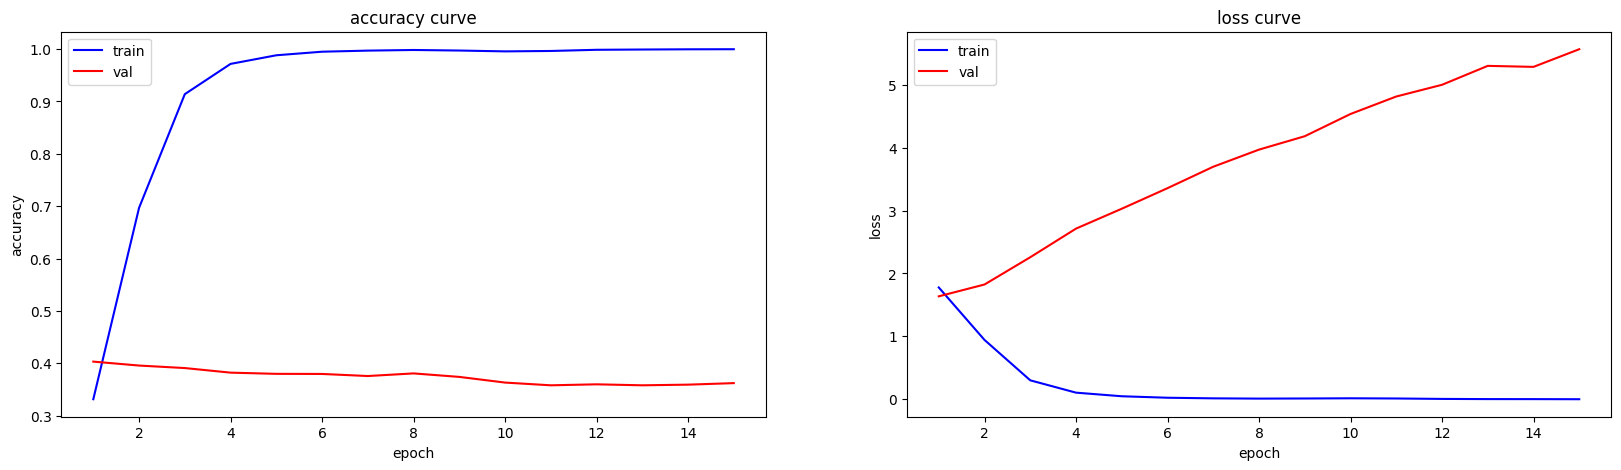

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))

# plot the accuracy curve
plt.subplot(121)
x = np.arange(len(training_log.accuracy)) + 1
train, = plt.plot(x, training_log.accuracy, 'b')
val, = plt.plot(x, training_log.val_accuracy, 'r')
plt.title('accuracy curve')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')

# plot the loss curve
plt.subplot(122)
x = np.arange(len(training_log.loss)) + 1
train, = plt.plot(x, training_log.loss, 'b')
val, = plt.plot(x, training_log.val_loss, 'r')
plt.title('loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')
plt.show()

## 4. BiLSTM Model

### 4.1 Generate Sequence 

Here I generate the tokens of terms using `Tokenizer`. BiLSTM consider the context of the text, therefore the input order matters. The input layer (embedding layer) requires texts with same length. Here I use padding to add 0 at the end of the text which length is smaller than `MAX_SEQ_LENGTH`. For the texts which length is larger than `MAX_SEQ_LENGTH`, I truncate them.

In [28]:
# import library
import string
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [29]:
# set the tokenizer
MAX_NUM_WORDS = 50000
MAX_SEQ_LENGTH = 30
EMBEDDING_DIM = 200

tokenizer = Tokenizer(num_words = MAX_NUM_WORDS, filters = string.punctuation, lower=True)
tokenizer.fit_on_texts(df_train['text'].values)

word_index = tokenizer.word_index
print("# of unique tokens:", len(word_index))

# of unique tokens: 44369


In [30]:
# generate the tokens
sequence = tokenizer.texts_to_sequences(df_train['text'].values)
paddings = pad_sequences(sequence, maxlen=MAX_SEQ_LENGTH, padding='post', truncating = 'post')
print("shape of input:", paddings.shape)

shape of input: (24000, 30)


### 4.2 Prepare training and testingset

The testing data is splited out to do the validation in order to modify the model. The emotion labels is transformed into one hot encoding.

In [36]:
# get data
X = paddings
y = df_train.emotion

In [37]:
# split training set and testint set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, 
                                                    random_state = 27, stratify = y)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 30)
(4800, 30)
(19200,)
(4800,)


In [39]:
# deal with label into one hot
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 30)
(4800, 30)
(19200, 8)
(4800, 8)


### 4.3 Word2Vec

I load the tweeter pre-trained word vector to form the embedding matrix. Embedding is used to construct the embedding layer.

In [41]:
# download the model
from gensim.models import KeyedVectors

model_path = "glove.twitter.27B.200d.txt.gz"
w2v = KeyedVectors.load_word2vec_format(model_path, binary=False)
print('Finish loading!')

Finish loading!


In [42]:
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in tokenizer.word_index.items():
    if word in w2v.key_to_index:
        embedding_matrix[i] = w2v[word]

print("embedding shape:", embedding_matrix.shape)

embedding shape: (44370, 200)


### 4.4 Build Model

The BiLSTM is consisted of embedding layer, BiLSTM layer (two LSTM layers), and the output layer (dense). 

In [43]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Embedding
from keras.layers import LSTM, Bidirectional

In [44]:
embedding_layer = Embedding(vocab_size, 
                            EMBEDDING_DIM, 
                            weights = [embedding_matrix], 
                            mask_zero = True,
                            input_length = MAX_SEQ_LENGTH, 
                            trainable = False)

In [45]:
# I/O check
input_shape = MAX_SEQ_LENGTH
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  30
output_shape:  8


The following functions are used to exam the classification result, including recall, precision, and f1 score.

In [72]:
from keras import backend as K

def recall_m(y_true, y_pred): # TPR
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) # TP
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1))) # P
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) # TP
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1))) # TP + FP
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def TP(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1))) # TP
    y_pos = K.round(K.clip(y_true, 0, 1))
    n_pos = K.sum(y_pos)
    y_neg = 1 - y_pos
    n_neg = K.sum(y_neg)
    n = n_pos + n_neg
    return tp/n

def TN(y_true, y_pred):
    y_pos = K.round(K.clip(y_true, 0, 1))
    n_pos = K.sum(y_pos)
    y_neg = 1 - y_pos
    n_neg = K.sum(y_neg)
    n = n_pos + n_neg
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    tn = K.sum(K.round(K.clip(y_neg * y_pred_neg, 0, 1))) # TN
    return tn/n

def FP(y_true, y_pred):
    y_pos = K.round(K.clip(y_true, 0, 1))
    n_pos = K.sum(y_pos)
    y_neg = 1 - y_pos
    n_neg = K.sum(y_neg)
    n = n_pos + n_neg
    tn = K.sum(K.round(K.clip(y_neg * y_pred, 0, 1))) # FP
    return tn/n

def FN(y_true, y_pred):
    y_pos = K.round(K.clip(y_true, 0, 1))
    n_pos = K.sum(y_pos)
    y_neg = 1 - y_pos
    n_neg = K.sum(y_neg)
    n = n_pos + n_neg
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos
    tn = K.sum(K.round(K.clip(y_true * y_pred_neg, 0, 1))) # FN
    return tn/n

In [73]:
# build BiLSTM model
inputs = Input(shape = (input_shape,), dtype = 'float32')
x = embedding_layer(inputs)
x = Bidirectional(LSTM(128, return_sequences = True))(x)
x = Bidirectional(LSTM(128))(x)
outputs = Dense(output_shape, activation = "sigmoid")(x)

model = Model(inputs, outputs)
opt = keras.optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = opt,
              metrics=['accuracy',f1_m,precision_m, recall_m, TP, TN, FP, FN])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 200)           8874000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 256)          336896    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 9,607,192
Trainable params: 733,192
Non-train

### 4.5 Training

To avoid overfitting, I store checkpoints to record the best model. Fro the training log, we can observe that the check will only store the model having better performance.

In [48]:
# save the training lag
from keras.callbacks import CSVLogger
from keras.callbacks import Callback
from sklearn.metrics import f1_score, classification_report
csv_logger = CSVLogger('logs/training_log.csv')

In [49]:
# save the checkpoint
from keras.callbacks import ModelCheckpoint
filepath = "./model/BiLSTM5_weights_{epoch:02d}.h5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [51]:
# training setting
epochs = 7
batch_size = 32

In [53]:
# training!
history = model.fit(X_train, y_train, 
                    epochs = epochs, 
                    batch_size = batch_size, 
                    callbacks = [callbacks_list, csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/7


2022-11-22 23:32:45.337248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:32:46.253038: W tensorflow/core/common_runtime/forward_type_inference.cc:332] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_FLOAT
    }
  }
}

	while inferring type of node 'cond_20/output/_23'
2022-11-22 23:32:46.256111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:32:46.518550: I tensorflow/co

600/600 [==============================] - ETA: 0s - loss: 1.8277 - accuracy: 0.2877 - f1_m: 0.3065 - precision_m: 0.1929 - recall_m: 0.7491 - TP: 0.0936 - TN: 0.4812 - FP: 0.3938 - FN: 0.0314

2022-11-22 23:34:31.714820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:34:32.082011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:34:32.177712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:34:32.795114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:34:32.864171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.35083, saving model to ./model/BiLSTM5_weights_01.h5
600/600 [==============================] - 127s 197ms/step - loss: 1.8277 - accuracy: 0.2877 - f1_m: 0.3065 - precision_m: 0.1929 - recall_m: 0.7491 - TP: 0.0936 - TN: 0.4812 - FP: 0.3938 - FN: 0.0314 - val_loss: 1.7307 - val_accuracy: 0.3508 - val_f1_m: 0.3152 - val_precision_m: 0.1977 - val_recall_m: 0.7785 - val_TP: 0.0973 - val_TN: 0.4793 - val_FP: 0.3957 - val_FN: 0.0277
Epoch 2/7
600/600 [==============================] - ETA: 0s - loss: 1.6458 - accuracy: 0.3869 - f1_m: 0.3376 - precision_m: 0.2152 - recall_m: 0.7845 - TP: 0.0981 - TN: 0.5167 - FP: 0.3583 - FN: 0.0269
Epoch 2: val_accuracy improved from 0.35083 to 0.38583, saving model to ./model/BiLSTM5_weights_02.h5
600/600 [==============================] - 101s 168ms/step - loss: 1.6458 - accuracy: 0.3869 - f1_m: 0.3376 - precision_m: 0.2152 - recall_m: 0.7845 - TP: 0.0981 - TN: 0.5167 - FP: 0.3583 - FN: 0.0269 - val_loss: 1.6

In [54]:
training_log = pd.read_csv("logs/training_log.csv")

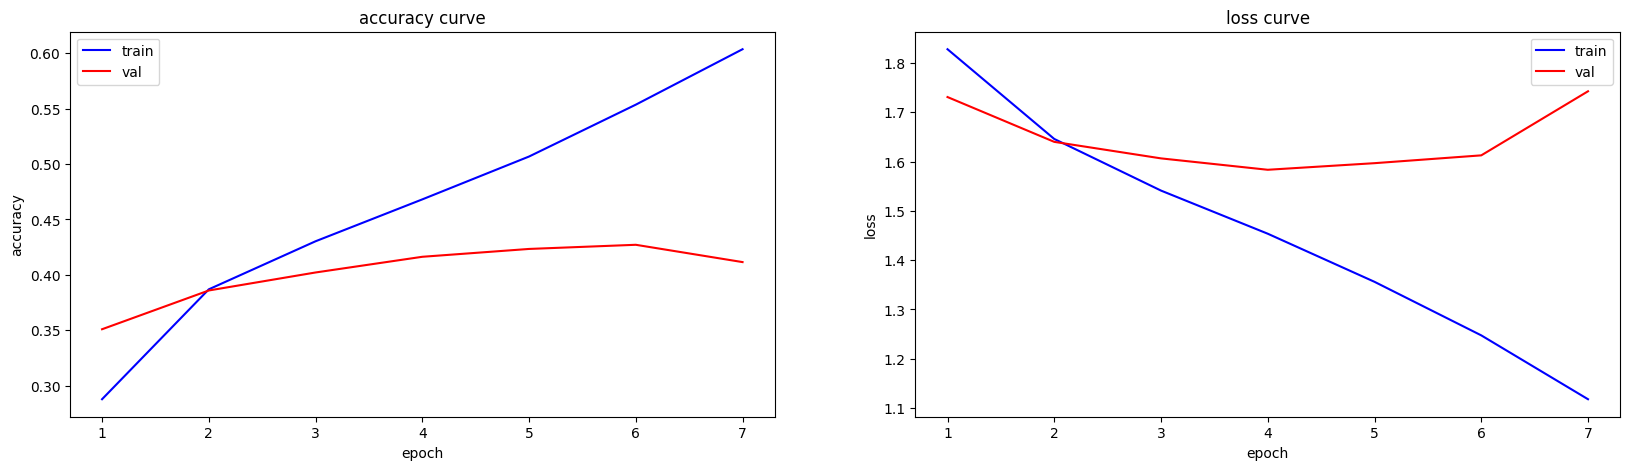

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))

# plot the accuracy curve
plt.subplot(121)
x = np.arange(len(training_log.accuracy)) + 1
train, = plt.plot(x, training_log.accuracy, 'b')
val, = plt.plot(x, training_log.val_accuracy, 'r')
plt.title('accuracy curve')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')

# plot the loss curve
plt.subplot(122)
x = np.arange(len(training_log.loss)) + 1
train, = plt.plot(x, training_log.loss, 'b')
val, = plt.plot(x, training_log.val_loss, 'r')
plt.title('loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')
plt.show()

From the loss curve, we can observe that the model start overfitting at the 6th epoch.

### 4.6 Validation

I use the validation data to visualize the classification result. 

In [56]:
# validation
pred_result = model.predict(X_test, batch_size = 32)
pred_result = label_decode(label_encoder, pred_result)

2022-11-22 23:44:57.103912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:44:57.423530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:44:57.502121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:44:58.000588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:44:58.078895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 14s 79ms/step


In [57]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.41


In [58]:
y_test = label_decode(label_encoder, y_test)

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=pred_result))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=pred_result)
print('confusion matrix:')
print(cm)

classification report:
              precision    recall  f1-score   support

       anger       0.50      0.45      0.47       600
anticipation       0.57      0.44      0.50       600
     disgust       0.40      0.33      0.36       600
        fear       0.38      0.59      0.46       600
         joy       0.38      0.35      0.36       600
     sadness       0.33      0.36      0.35       600
    surprise       0.38      0.39      0.39       600
       trust       0.41      0.39      0.40       600

    accuracy                           0.41      4800
   macro avg       0.42      0.41      0.41      4800
weighted avg       0.42      0.41      0.41      4800

confusion matrix:
[[270  16  66  79  21  90  31  27]
 [ 21 266  11  63  79  34  48  78]
 [ 67  13 195  77  23 111  81  33]
 [ 25  36  29 352  36  56  43  23]
 [ 26  51  22  87 210  48  55 101]
 [ 69  20  85  79  28 217  66  36]
 [ 36  24  54 113  35  67 233  38]
 [ 25  39  30  71 119  32  52 232]]


The accuracy of the BiLSTM model is about 0.41.

### 4.7 Save the Model

In [60]:
# save model
model_json = model.to_json()
with open("model/BiLSTM5.json", "w") as json_file:
    json_file.write(model_json)

In [61]:
model.save_weights("model/BiLSTM5.h5")
print("Saved model to disk")

Saved model to disk


### 4.8 Predict

To predict the classification, I load the best model recieve from previous part and do the same preprocessing process to the testing data.

In [62]:
from keras.models import model_from_json
# load json and create model
json_file = open('model/BiLSTM5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
BiLSTM_model = model_from_json(loaded_model_json)

# load weights into new model
BiLSTM_model.load_weights("model/BiLSTM5_weights_03.h5")
print("Loaded model from disk")

Loaded model from disk


In [63]:
sequence = tokenizer.texts_to_sequences(df_test['text'].values)
paddings = pad_sequences(sequence, maxlen=MAX_SEQ_LENGTH, padding='post', truncating = 'post')
paddings.shape

(411972, 30)

In [64]:
pred_X = paddings

In [65]:
# predict
pred_result = BiLSTM_model.predict(pred_X, batch_size = 32)
print(pred_result[:5])

2022-11-22 23:45:18.140657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:45:18.547961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:45:18.658654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:45:19.201597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:45:19.322940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12875/12875 [==============================] - 942s 73ms/step
[[0.20521255 0.943778   0.14059854 0.28001043 0.7841989  0.25937206
  0.247463   0.69424516]
 [0.34450334 0.9324782  0.23889624 0.2668645  0.57776874 0.47591758
  0.27664697 0.55376464]
 [0.53725827 0.42479274 0.6720194  0.3841349  0.3639185  0.60627294
  0.58767307 0.39850593]
 [0.30248603 0.77568835 0.20409945 0.41678092 0.66026264 0.23999575
  0.64131856 0.5879166 ]
 [0.37016422 0.5850927  0.50313133 0.35397643 0.47981316 0.39994448
  0.5798854  0.58977515]]


In [66]:
y_pred = label_decode(label_encoder, pred_result)
y_pred[:20]

array(['anticipation', 'anticipation', 'disgust', 'anticipation', 'trust',
       'surprise', 'surprise', 'disgust', 'surprise', 'disgust', 'joy',
       'surprise', 'disgust', 'sadness', 'anger', 'surprise', 'anger',
       'sadness', 'anticipation', 'disgust'], dtype=object)

In [68]:
tweet_id = df_test.tweet_id.tolist()

In [70]:
df = pd.DataFrame(list(zip(tweet_id, y_pred)), columns =['id', 'emotion']) 

In [71]:
# save the prediction result
df.to_csv("./result/result_BiLSTM_RW_5_3.csv",index=False)